![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm # Vamos usar muito !

# Mínimos quadrados _vs_ Equações Normais

Vimos duas formas de resolver um problema de regressão:
- encontrando a solução de mínimos quadrados para $Xp = b$;
- resolvendo as equações normais $X^\top X p = X^\top b$.

Neste teste, veremos como isto pode gerar diferenças no cálculo de $p$.

# Questão 1: Comparando soluções

Sejam dados uma matriz $A$, $m \times n$, e um vetor $b$.

Escreva uma função que retorna as duas soluções do problema de regressão,
a primeira usando `np.linalg.solve` e a segunda, `np.linalg.lstsq`.

In [96]:
def duas_sols(A,b):
    return ( np.linalg.solve(A.T@A, A.T@b), np.linalg.lstsq(A, b, rcond=None)[0])

In [97]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,2,3,4,5,6]

x1, x2 = duas_sols(A,b)
assert np.allclose(x1,x2)

In [98]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [0,1,0,1,0,1]

x1, x2 = duas_sols(A,b)
assert np.allclose(x1,x2)

In [99]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [1,1,1,0,0,0]

x1, x2 = duas_sols(A,b)

assert norm(x1-x2) < 1e-14

Ao resolver um problema de regressão, a medida "oficial" é o **erro de regressão**.
Assim, poderia muito bem haver duas soluções $x_1$ e $x_2$, diferentes,
mas tais que $\|Ax_1 - b\|$ e $\|Ax_2 - b\|$ fossem iguais.

Complete a sua função para retornar, também, o erro da regressão, para cada uma das soluções.
Retorne duas tuplas, uma com as 2 soluções, a segunda com os 2 erros.

In [100]:
def duas_sols_erros(A,b):
    x1, x2 = duas_sols(A, b)
    return ((x1, x2), (norm(A@x1 - b), norm(A@x2 - b)))

In [101]:
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
b = [6,5,4,3,2,1]

(x1, x2), (e1, e2) = duas_sols_erros(A,b)
assert np.allclose(x1,x2)
assert 7 < e1 < 8
assert 7 < e2 < 8

Calcule os erros de regressão para cada um dos casos anteriores,
e também a diferença entre eles.

In [102]:
bs = ([1,2,3,4,5,6], [0,1,0,1,0,1], [1,1,1,0,0,0], [6,5,4,3,2,1])
A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
for i, b in  enumerate(bs):
    (x1, x2), (e1, e2) = duas_sols_erros(A,b)
    print("Caso", i)
    print("Erro 1: ", e1)
    print("Erro 2: ", e2)
    print("Diferença: ", abs(e2 - e1))




Caso 0
Erro 1:  1.2273929715024061
Erro 2:  1.2273929715024061
Diferença:  0.0
Caso 1
Erro 1:  1.044465935734187
Erro 2:  1.044465935734187
Diferença:  0.0
Caso 2
Erro 1:  1.627682600923979
Erro 2:  1.6276826009239789
Diferença:  2.220446049250313e-16
Caso 3
Erro 1:  7.631105177742358
Erro 2:  7.631105177742358
Diferença:  0.0


O que você observa?

Os erros são praticamente iguais e a diferença na maioria dos casos é zero. No caso 2 isso não ocorreu, mas a diferença é bem próxima de zero.

# Questão 2: Analisando muitos casos

Para entender o comportamento médio, vamos gerar vetores $b$ aleatórios.

Compare, com um histograma, os erros de regressão, para 1000 vetores $b$ aleatórios, e a matriz $A$ acima.

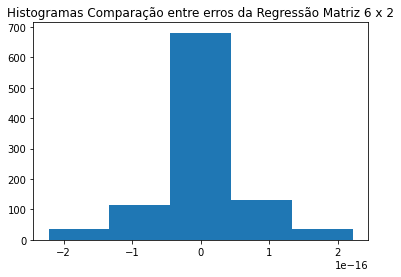

In [103]:

A = np.array([[0,1],[1,1],[2,1],[2,2],[3,2],[4,4]])
np.random.seed(1)
erros = []
for _ in range(0, 1000):
    (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(6))
    erros.append(e2 - e1)

plt.hist(erros, bins=5)

plt.title("Histogramas Comparação entre erros da Regressão Matriz 6 x 2")

ax = plt.gca()

In [104]:
minx, maxx = ax.get_xlim()

assert -2e-15 < minx < maxx < 2e-15

Algum dos métodos dá consistentemente o menor erro?

Não, isso pode ser visto pelo histograma. Caso um dos lados do histograma estivesse mais "carregado", ou seja, as barras aparesentassem uma diferença de altura significativa quando comparamos com o outro lado, poderíamos dizer que um método apresenta menor ou maior erro. Entretando, obtivemos uma forma simétrica de histograma que nos indica que, quando há diferença entre os erros, ela é pequena e beneficia os diferentes erros com praticamente a mesmma frequência.

Agora, vamos usar matrizes (bem) maiores.

Escolha uma matriz $A$, $30 \times 4$ com entradas uniformemente escolhidas em $[0,1]$,
e repita o que fizemos acima para 1000 valores aleatórios de $b$.

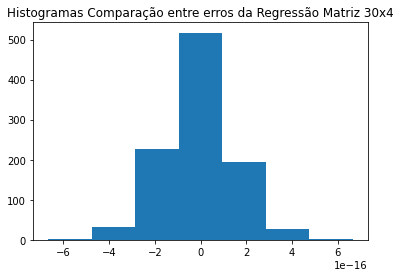

In [105]:
np.random.seed(2)
A = np.random.rand(30,4)
erros = []
for _ in range(0, 1000):
    (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(30))
    erros.append(e2 - e1)

plt.hist(erros, bins=7)

plt.title("Histogramas Comparação entre erros da Regressão Matriz 30x4")

ax = plt.gca()

In [106]:
minx, maxx = ax.get_xlim()

assert -4e-15 < minx < maxx < 4e-15

O comportamento dos erros mudou?

O comportamento não mudou. Ainda temos o 0 como a diferença mais frequente entre os erros, mas diferenças maiores entre os erros começaram a ser mais frequentes.

E agora, faça para matrizes $300 \times 10$.

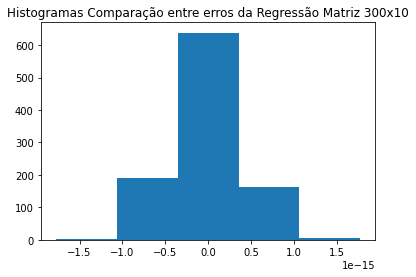

In [107]:
np.random.seed(1)
A = np.random.rand(300,10)
erros = []
for _ in range(0, 1000):
    (x1, x2), (e1, e2) = duas_sols_erros(A,np.random.rand(300))
    erros.append(e2 - e1)

plt.hist(erros, bins=5)

plt.title("Histogramas Comparação entre erros da Regressão Matriz 300x10")

ax = plt.gca()

In [108]:
minx, maxx = ax.get_xlim()

assert -10e-15 < minx < maxx < 10e-15

Esse gráfico confirma a tendência quando a matriz fica maior?

O comportamento observado se mantém. Continuamos com o 0 como a diferença mais frequente. Novamente, diferenças maiores entre os erros passaram a ser mais frequentes quando comparamos com o gráfico anterior. Repare que a escala dessa gráfico no eixo x é diferente, o que pode dar a impressão de que as diferenças maiores ficaram menos frequentes, mas não é verdade.

# Questão 3: Matrizes de Hilbert

A matriz de Hilbert é uma matriz famosa, cujas entradas $H_{i,j}$ são $\frac{1}{i+j-1}$.

Por exemplo, a matriz $3\times 2$ é
$$\begin{bmatrix}
  1 & 1/2 \\
1/2 & 1/3 \\
1/3 & 1/4
\end{bmatrix}$$

Escreva a função `hilb(n,m)` que retorna a matriz de Hilbert $n \times m$:

In [109]:
def hilb(n,m):
    hil = []
    for i in range(1, n+1):
        linha = []
        for j in range(1, m+1):
            linha.append(1/(i+j-1))
        hil.append(linha)

    return np.array(hil)


In [110]:
assert np.all(hilb(3,2) == [[1, 1/2], [1/2, 1/3], [1/3, 1/4]])

In [111]:
H = hilb(40,20)
assert H.shape == (40,20)

In [112]:
H = hilb(30,4)
assert H[10,3] == 1/(10+3+1)

Explique porque o teste acima é feito com $\frac{1}{10+3+1}$ em vez de $\frac{1}{10+3-1}$.

Na realidade, a posição $H[10][3]$ da matriz programada se refere ao valor $H_{11, 4}$. Esse valor pode ser calculado com a fórmula $H_{11, 4} = \frac{1}{11 + 4 - 1} = \frac{1}{10 + 3 + 1}$.

# Questão 4: Regressão com a matriz de Hilbert

Considere a matriz de Hilbert $30 \times 4$, e calcule a regressão para um vetor $b$ aleatório.
Calcule
- a diferença entre as soluções; e
- a diferença entre os erros de regressão.

In [113]:
np.random.seed(1)
(x1, x2), (e1, e2) = duas_sols_erros(hilb(30, 4), np.random.rand(30))

print("Diferença absoluta entre as soluções: ")
print(x2 - x1)

print("Diferença entre os erros de regressao: ")
print(e1-e2)



Diferença absoluta entre as soluções: 
[-4.14157597e-09  3.60174681e-08 -7.30876764e-08  4.19346406e-08]
Diferença entre os erros de regressao: 
-8.881784197001252e-15


Calcule, também, o erro relativo entre as soluções, de duas formas:
- coordenada a coordenada, $\frac{|x1_i - x2_i|}{|x1_i| + |x2_i|}$,
- global, $\frac{||x1 - x2||}{||x1|| + ||x2||}$.

(Obs: como não há um método que seja "a priori" mais exato do que o outro, normalizamos pela soma dos valores absolutos)

In [114]:
print("Erro relativo coordenada a coordenada ")
print([ abs(xi1 - xi2)/(abs(xi1) + abs(xi2)) for xi1, xi2 in  zip(x1, x2)])

print("Erro relativo global ")
print(norm(x1 - x2)/(norm(x1) + norm(x2)))





Erro relativo coordenada a coordenada 
[4.076377372680005e-11, 3.6419872304558795e-11, 3.3642197554951726e-11, 3.156565689162791e-11]
Erro relativo global 
3.3556221998169496e-11


Agora, aumente para $300 \times 10$, e calcule
- a diferença entre as soluções,
- os erros relativos entre as soluções,
- a diferença entre os erros de regressão.

In [118]:
np.random.seed(1)
(x1, x2), (e1, e2) = duas_sols_erros(hilb(300, 10), np.random.rand(300))

print("Diferença entre as soluções: ")
print(x2 - x1)

print("Erro relativo coordenada a coordenada ")
print([ abs(xi1 - xi2)/(abs(xi1) + abs(xi2)) for xi1, xi2 in  zip(x1, x2)])

print("Erro relativo global ")
print(norm(x1 - x2)/(norm(x1) + norm(x2)))

print("Diferença entre os erros de regressao: ")
print(e1-e2)


Diferença entre as soluções: 
[-2.99960896e+04  2.08789881e+06 -3.60583547e+07  2.69785739e+08
 -1.07602687e+09  2.51051911e+09 -3.54302152e+09  2.98036996e+09
 -1.37638268e+09  2.68756809e+08]
Erro relativo coordenada a coordenada 
[0.48510655392034663, 0.6174074520197349, 0.7271466262445446, 0.8185000304735681, 0.8943758018430623, 0.957064994926634, 1.0, 1.0, 1.0, 1.0]
Erro relativo global 
0.9810478112240045
Diferença entre os erros de regressao: 
0.3690314886726336


O que aconteceu?

Agora, com a matriz maior:
- As soluções estão muito diferentes em praticamente todas as suas coordenadas, mas principalmente nas últimas coordenadas, como podemos ver no vetor de diferença entre as soluções.

-  O erro relativo está grande coordenada a coordenada, principalmente para as últimas coordenadas. Para as últimas 4 coordenadas o erro relativo chegou em 1. Isso é uma péssima notícia, pois significa que o diferença entre as soluções tem praticamente a mesma magnitude da soma das soluções.

- Novamente, este valor próximo de 1 para o erro relativo indica que o a diferença entre as soluções é da ordem da soma das soluções; o que é péssimo, pois gostaríamos de soluções parecidas, ou seja, com uma diferença pequena quando comparada com a soma das soluções.

- Como podemos ver pela diferença entre os erros de regressão, existe um método que erra mais que o outro neste caso. O erro $e_2$ é menor que o erro $e_1$ já que o valor é positivo. Ou seja, o método np.linalg.lstsq foi mais eficiente no cálculo da solução.


Conclusão final, aumentar o tamanho da matriz de Hilbert piorou os resultados, uma vez que isso gerou soluções bem diferentes para nossos métodos. Além disso, as últimas coordenadas dos vetores solução são as que mais diferem. 

# Questão 5: Outro sistema

Agora, considere a matriz com entradas inteiras em sequência:
$$ A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \\
13 & 14 & 15 \\
16 & 17 & 18
\end{bmatrix} $$

Resolva o problema de regressão para o vetor $b = (1,1,1,1,1,1)$, pelos dois métodos, e calcule os erros.

In [124]:
A = np.arange(1, 19).reshape(6, 3)
b = np.array([1]*6)
(x1, x2), (e1, e2) = duas_sols_erros(A, b)

LinAlgError: Singular matrix

O que aconteceu?

Ocorreu um erro, pois estamos passando para o método solve uma matriz não inversível. Podemos ver isso calculando o determinante de $A^T A$ é verificando que ele é nulo. Quando não é inversível não existe solução ou existem infinitas soluções para o sistema linear, por isso o np.solve não consegue resolver.

In [126]:
np.linalg.det(A.T@A)

0.0